In [376]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Tu so zbrani vsi podatki.

In [301]:
podatki = pd.read_csv('zbrani_podatki.csv', dtype={"LETO": "Int32"})
pd.options.display.max_rows = 50
podatki

,ID,LETO,AVTOR,MESTO,DRŽAVA,TABLATURA,INSTRUMENT,STRUNE,RAZPRAVA
0,0,0,NONE,NONE,NONE,German tablature,lute,5,NE
1,1,1460,NONE,Brunswick,Germany,NONE,lute,5,NE
2,2,0,NONE,Königstein,Germany,German tablature,lute,5,NE
3,3,0,NONE,Fritzlar,Germany,keyboard tablature,lute,5,NE
4,4,0,NONE,NONE,NONE,"Italian tablature, French tablature, Neapolita...","guitar, lute",6,NE
...,...,...,...,...,...,...,...,...,...
9399,9399,0,NONE,Leipzig and Mainz,Germany,NONE,guitar,NONE,NE
9400,9400,0,NONE,Hamburg and Altona,Germany,NONE,guitar,NONE,NE
9401,9401,0,NONE,Vienna,Austria,NONE,guitar,NONE,NE
9402,9402,0,NONE,Bonn,Germany,NONE,guitar,NONE,NE


In [302]:
podatki_države = podatki[podatki.DRŽAVA != "NONE"].groupby("DRŽAVA")
podatki_države.size().sort_values().tail(15)

DRŽAVA
Bohemia              9
Denmark             14
USA                 15
Sweden              17
Poland              17
Switzerland         22
Czech Republic      45
Netherlands         50
Belgium             52
Spain               94
England            304
Italy              524
Austria            789
France            1360
Germany           1991
dtype: int64

In [313]:
podatki_tablature = podatki[podatki.TABLATURA != "NONE"].groupby("TABLATURA")
podatki_tablature.size().sort_values().tail(10)

TABLATURA
Spanish tablature                        3
Neapolitan tablature                     3
unknown tablature                        5
keyboard tablature                       7
Italian tablature, French tablature      8
alfabeto tablature                       9
lute tablature                          15
German tablature                       107
Italian tablature                      389
French tablature                       979
dtype: int64

<Axes: xlabel='TABLATURA'>

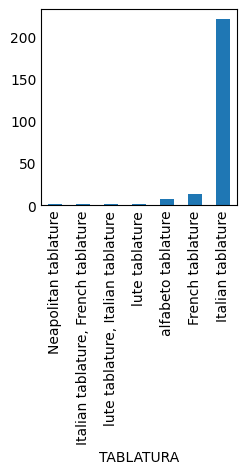

In [304]:
italija_tablature = podatki[(podatki.DRŽAVA == "Italy") & (podatki.TABLATURA != "NONE")].groupby("TABLATURA")
italija_tablature.size().sort_values().tail(10).plot.bar()

Text(0.5, 1.0, 'Število izdanih razprav glede na državo')

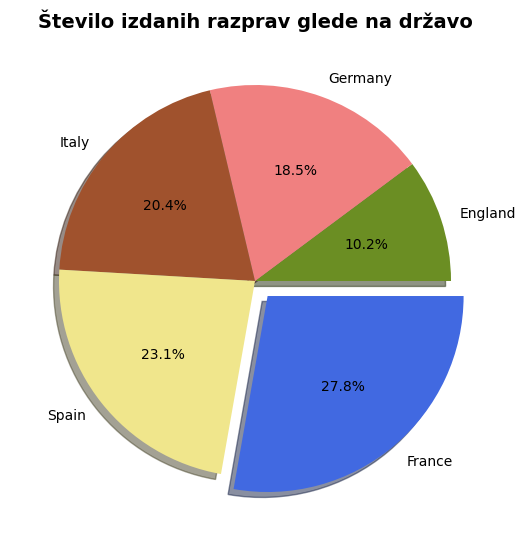

In [477]:
države_razprava = podatki[(podatki.DRŽAVA != "NONE") & (podatki.RAZPRAVA == "DA")].groupby("DRŽAVA")
razprave_diagram = države_razprava.size().sort_values().tail(5).plot.pie(
    colors=['olivedrab', 'lightcoral', 'sienna', 'khaki', "royalblue"], 
    explode = (0, 0, 0, 0, 0.1), shadow=True, autopct='%1.1f%%', figsize = (5, 5))
razprave_diagram.title.set_text("Število izdanih razprav glede na državo")
plt.title("Število izdanih razprav glede na državo", fontsize=14, weight="bold")

Text(11.3, 270, '1800 - 1850')

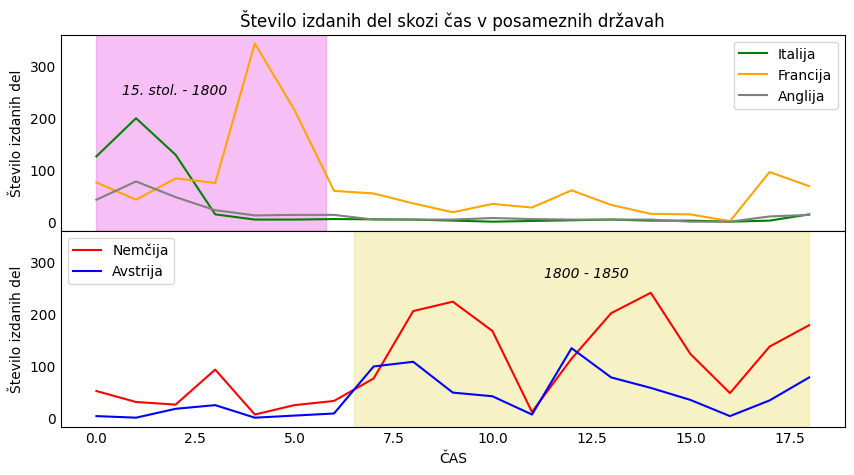

In [460]:
podatki["ČAS"] = podatki.ID // 500
fig = plt.figure(figsize = (8, 4),)
gs = fig.add_gridspec(2, hspace=0)
axes= gs.subplots(sharex= True, sharey= True)

for ax in axes.flat:
    ax.set(ylabel= "Število izdanih del")

italija_čas = podatki[podatki.DRŽAVA == "Italy"].groupby("ČAS").size().plot(ax=axes[0], label = "Italija", legend = True, color= "green")
nemčija_čas = podatki[podatki.DRŽAVA == "Germany"].groupby("ČAS").size().plot(ax=axes[1], label = "Nemčija", legend = True, color="red")
francija_čas = podatki[podatki.DRŽAVA == "France"].groupby("ČAS").size().plot(ax=axes[0], label = "Francija", legend = True, color= "orange")
avstrija_čas = podatki[podatki.DRŽAVA == "Austria"].groupby("ČAS").size().plot(ax=axes[1], label = "Avstrija", legend = True, color= "blue")
anglija_čas = podatki[podatki.DRŽAVA == "England"].groupby("ČAS").size().plot(ax=axes[0], label = "Anglija", legend = True, color="gray")
axes[0].axvspan(0, 5.8, alpha=0.5, color='violet')
axes[1].axvspan(6.5, 18, alpha=0.5, color='khaki')

italija_čas.title.set_text("Število izdanih del skozi čas v posameznih državah")
axes[0].text(0.65, 245, '15. stol. - 1800', style='italic')
axes[1].text(11.3, 270, '1800 - 1850', style='italic')





Text(0.5, 0, 'Število (parov) strun')

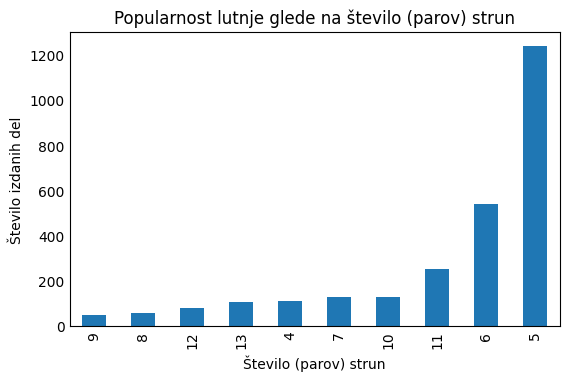

In [484]:
strune = podatki[(podatki.STRUNE != "NONE")].groupby("STRUNE")
st = []
for x in range(9403):
    st += str(podatki.loc[x].at["STRUNE"]).split(", ")
table = pd.DataFrame(st, columns=['st'])
table[table.st != "NONE"].groupby("st").size().sort_values().tail(10).plot.bar(figsize = (5, 3))
plt.title("Popularnost lutnje glede na število (parov) strun")
plt.ylabel("Število izdanih del")
plt.xlabel("Število (parov) strun")



[Text(0, 0.5, 'Število izdanih del')]

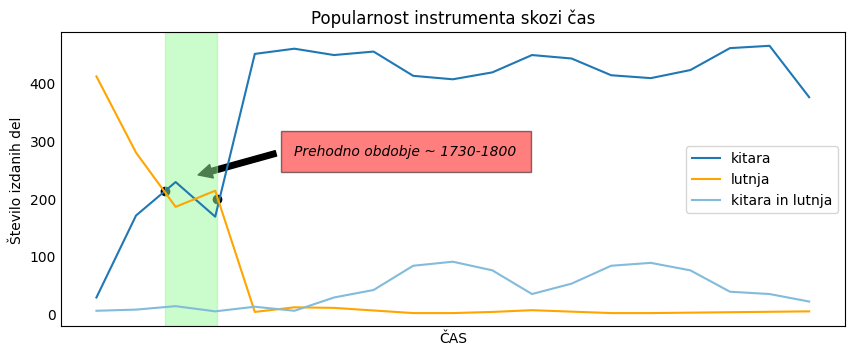

In [418]:
fig, ax = plt.subplots(1, figsize= (8,3))
plt.title("Popularnost instrumenta skozi čas")


plt.scatter(3.05,200, color= "black")
plt.scatter(1.72,214, color= "black")
kitara_čas = podatki[podatki.INSTRUMENT == "guitar"].groupby("ČAS").size().plot(ax=ax, label = "kitara", legend = True, xticks=[])
lutnja_čas = podatki[podatki.INSTRUMENT == "lute"].groupby("ČAS").size().plot(ax=ax, label = "lutnja", legend = True, xticks=[], color="orange")
kitaralutnja_čas = podatki[podatki.INSTRUMENT == "guitar, lute"].groupby("ČAS").size().plot(ax=ax, label = "kitara in lutnja", legend = True)

ax.text(5, 275, 'Prehodno obdobje ~ 1730-1800', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
puščica = (mpatches.FancyArrowPatch((4.6, 280), (2.5,240),
                                 mutation_scale=20, color="black"))
ax.add_patch(puščica)
ax.axvspan(1.72, 3.05, alpha=0.5, color='palegreen')

ax.set(ylabel= "Število izdanih del")
